**Agata Semerjak, 402426**  
środa 17:00

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from scipy import stats
from sklearn import metrics

## Anomaly detection

In [2]:
data = loadmat('ex8data1.mat')  
X = data['X']

print("Amount of data:", X.shape)

Amount of data: (307, 2)


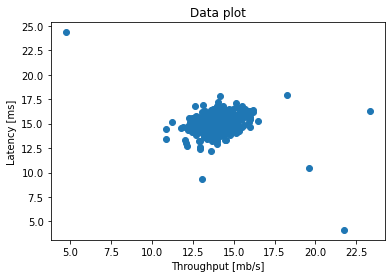

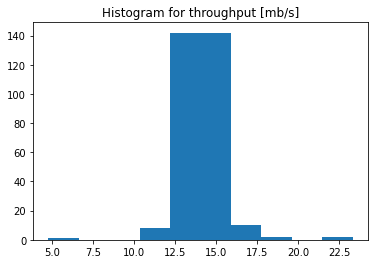

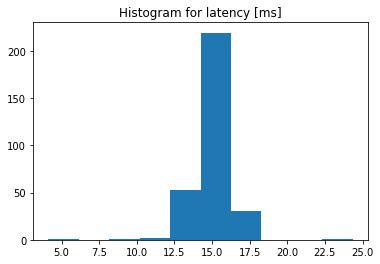

In [3]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Throughput [mb/s]')
plt.ylabel('Latency [ms]')
plt.title("Data plot")

plt.figure()
plt.hist(X[:, 0])
plt.title("Histogram for throughput [mb/s]")

plt.figure()
plt.hist(X[:, 1])
plt.title("Histogram for latency [ms]")

plt.show()


### Gaussian distribution

In [4]:
def estimate_gaussian(X):
    mu = []
    sigma = []
    for i in range(X.shape[1]):
        mu.append(np.mean(X[:, i]))
        sigma.append(np.var(X[:, i]))
    return mu, sigma


mu, sigma = estimate_gaussian(X)
print(mu, sigma)

[14.112225783945592, 14.99771050813621] [1.8326314134945172, 1.7097453308287784]


### Calculate probability

In [5]:
Xval = data['Xval']  
yval = data['yval']

print("Number of data:", Xval.shape, yval.shape)


Number of data: (307, 2) (307, 1)


In [6]:
# calculate the probability for X data
gauss1 = stats.norm.pdf(X[:50, 0], mu[0], np.sqrt(sigma[0]))
gauss2 = stats.norm.pdf(X[:50, 1], mu[1], np.sqrt(sigma[1]))

pval = np.zeros((Xval.shape[0], Xval.shape[1]))

#calculate the probability for Xval data
pval[:, 0] = stats.norm.pdf(Xval[:, 0], mu[0], np.sqrt(sigma[0]))
pval[:, 1] = stats.norm.pdf(Xval[:, 1], mu[1], np.sqrt(sigma[1]))



In [7]:
def select_threshold(pval, yval):
    f1s = []
    eps = np.linspace(np.min(pval), np.max(pval), 10000)

    for i in range(len(eps)):
        e = eps[i]
        x = np.where((pval[:, 0] < e), (np.where((pval[:, 1] < e), 1, 1)), (np.where((pval[:, 1] < e), 1, 0)))
        f1s.append(metrics.f1_score(yval, x))

    best_f1 = np.max(f1s)
    best_f1_idx = np.argmax(f1s)
    best_eps = eps[best_f1_idx]

    return best_eps, best_f1

In [8]:
best_eps, best_f1 = select_threshold(pval, yval)

print(best_eps, best_f1)

0.0003966715195093453 0.8750000000000001


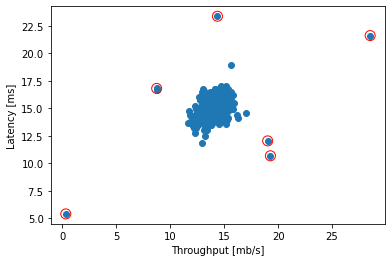

In [9]:

anomal = np.where(pval < best_eps)
anomal = list(dict.fromkeys(anomal[0]))

plt.figure()
plt.scatter(Xval[:, 0], Xval[:, 1])
plt.scatter(Xval[anomal[0]:anomal[-1], 0], Xval[anomal[0]:anomal[-1], 1], s=100, facecolors='none', edgecolors='r')
plt.xlabel('Throughput [mb/s]')
plt.ylabel('Latency [ms]')
plt.show()